In [ ]:
import pandas as pd
import numpy as np
import os

# Verifica se a pasta 'data_lake' existe. Se não existir, cria.
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define o número de arquivos a serem gerados
num_files = 10
# Define o número de linhas por arquivo
num_rows_per_file = 1000

# Lista para armazenar informações sobre os DataFrames gerados
dfs = []

# Loop para gerar e salvar dados em arquivos CSV
for i in range(num_files):
    # Gera dados simulados para cada coluna
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um DataFrame a partir dos dados gerados
    df = pd.DataFrame(data)

    # Define o nome do arquivo CSV
    file_name = f'data_lake/dados_{i+1}.csv'
    # Salva o DataFrame como um arquivo CSV
    df.to_csv(file_name, index=False)

    # Adiciona o nome do arquivo e o DataFrame à lista dfs
    dfs.append((file_name, df))

    # Imprime uma mensagem de sucesso para indicar que os dados foram gerados
    print("Dados do Data Lake gerados com sucesso!")

# Loop para imprimir os primeiros registros de cada DataFrame
for file_name, df in dfs:
    print(f"\nDados do arquivo: {file_name}\n")
    print(df.head())


In [20]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

# Verifica se a pasta 'data_lake' existe. Se não existir, cria.
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define o número de arquivos a serem gerados
num_files = 10
# Define o número de linhas por arquivo
num_rows_per_file = 1000

# Lista para armazenar os DataFrames gerados
dfs = []

# Loop para gerar e salvar dados em arquivos CSV
for i in range(num_files):
    # Gera dados simulados para cada coluna
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um DataFrame a partir dos dados gerados
    df = pd.DataFrame(data)

    # Define o nome do arquivo CSV com base no número da iteração
    file_name = f'data_lake/dados_{i+1}.csv'
    # Salva o DataFrame como um arquivo CSV
    df.to_csv(file_name, index=False)

    # Adiciona o DataFrame à lista dfs
    dfs.append(df)

# Mensagem indicando que os dados do Data Lake foram gerados com sucesso
print("Dados do Data Lake gerados com sucesso!")

# Define a string de conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'

# Cria a engine para o banco de dados SQLite
engine = create_engine(conn_string)

# Loop para escrever os DataFrames em tabelas no banco de dados SQLite
for i, df in enumerate(dfs, 1):
    # Define o nome da tabela com base no número da iteração
    table_name = f'dados_{i}'
    # Escreve o DataFrame na tabela correspondente no banco de dados, verifica se a tabela já existe, se sim substitui.
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Mensagem indicando que os DataFrames foram escritos com sucesso no banco de dados SQLite
print("DataFrames escritos com sucesso no banco de dados SQLite!")


Dados do Data Lake gerados com sucesso!
DataFrames escritos com sucesso no banco de dados SQLite!


Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       12 -2.513886       C
1       26  0.106746       A
2       47 -0.907300       A
3       76 -1.117189       B
4       66 -0.191223       A

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.594000    -0.028017
std      29.518647     1.007300
min       0.000000    -3.158793
25%      24.000000    -0.711761
50%      51.000000    -0.018473
75%      76.000000     0.679375
max      99.000000     3.012735


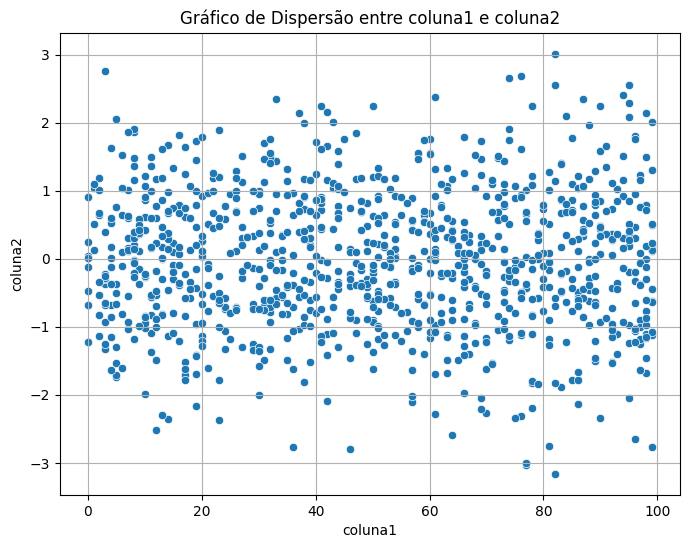

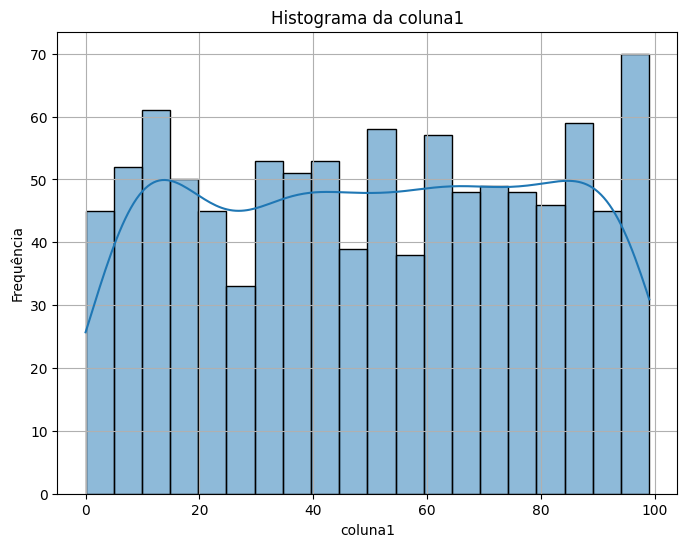

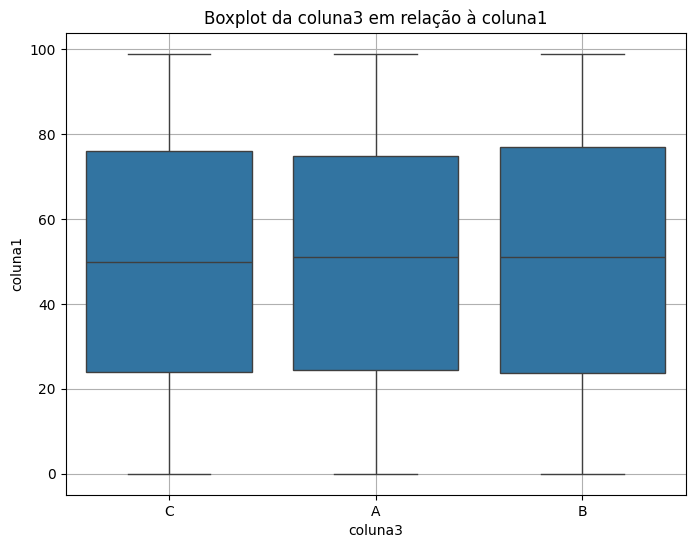

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Define a string de conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
# Cria a engine para o banco de dados SQLite
engine = create_engine(conn_string)

# Define o nome da tabela no banco de dados SQLite a ser consultada
table_name ='dados_1'
# Lê os dados da tabela especificada no DataFrame df
df = pd.read_sql_table(table_name, engine)

# Imprime as primeiras linhas do DataFrame df
print("Primeiras linhas do DataFrame:")
print(df.head())

# Imprime informações sobre o DataFrame df (por exemplo, tipo de dado, número de entradas não nulas)
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprime um resumo estatístico do DataFrame df (por exemplo, média, desvio padrão, mínimo, máximo, quartis)
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Plota um gráfico de dispersão entre as colunas 'coluna1' e 'coluna2'
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Plota um histograma da coluna 'coluna1'
plt.figure(figsize=(8,6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Plota um boxplot da coluna 'coluna1' em relação à coluna 'coluna3'
plt.figure(figsize=(8,6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
